In [1]:
import os, re, sys
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib

#%matplotlib widget
%matplotlib inline
from IPython.display import display
import ipywidgets as widgets
import matplotlib.pyplot as plt

import pretrained_networks

In [2]:
network_pkl = '/home/romain/win_desk/stylegan2/results/00098-stylegan2-feuilles1k-1gpu-config-e/network-snapshot-000600.pkl'
G, _D, Gs = pretrained_networks.load_networks(network_pkl)

truncation_psi = 1.0
w, h = 256, 256
seed = 45
rand = np.random.RandomState(seed)

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


In [3]:
Gs_kwargs = dnnlib.EasyDict()
Gs_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
Gs_kwargs.randomize_noise = False
if truncation_psi is not None:
    Gs_kwargs.truncation_psi = truncation_psi


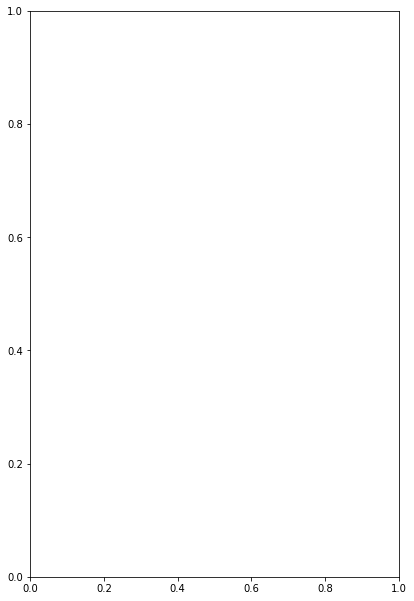

interactive(children=(IntSlider(value=8, description='c', max=16), FloatSlider(value=0.5, description='value',…

In [4]:
fig, ax = plt.subplots(figsize=(6.61, 10.41))

latent = np.array([rand.randn(Gs.input_shape[1])])
dlatent = Gs.components.mapping.run(latent, None) # [seed, layer, component]
images = Gs.components.synthesis.run(dlatent, **Gs_kwargs)
n_styles = dlatent.shape[1]
style_mix = np.ones(n_styles)

def next_image(reset=False):
    global style_mix
    global dlatent
    global latent
    
    if reset:
        latent = np.array([rand.randn(Gs.input_shape[1])])
        dlatent = Gs.components.mapping.run(latent, None) # [seed, layer, component]
        print('reset the image')

    mixed_dlatent = dlatent.copy()
    n_styles = dlatent.shape[1]
    for i in range(n_styles):
        mixed_dlatent[0][i] *= style_mix[i]

    images = Gs.components.synthesis.run(mixed_dlatent, **Gs_kwargs)
    return images

@widgets.interact(c=(0, 16, 1), value=(0.0, 1.0, 0.001))
def update(c, value, reset=False):
    style_mix[c] = 1 - value
    print('update', c, value)

    images = next_image(reset)
    [im.remove() for im in ax.images]
    ax.imshow(images[0])
    display(fig)

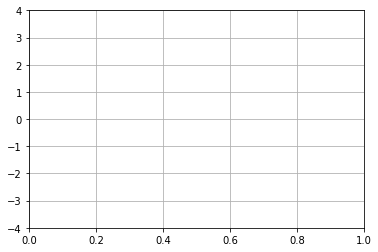

interactive(children=(IntSlider(value=1, description='w', max=10), FloatSlider(value=1.0, description='amp', m…

In [1]:
#%matplotlib widget
%matplotlib inline
from IPython.display import display
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-4, 4])
ax.grid(True)
 
# generate x values
x = np.linspace(0, 2 * np.pi, 100)

def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return amp*np.sin(w * (x-phi))

@widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))
def update(w = 1.0, amp=1, phi=0):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(x, my_sine(x, w, amp, phi), color='C0')
    display(fig)
    